In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/machine_learning/deep_learning/rnn/lstm/fish

/content/drive/MyDrive/machine_learning/deep_learning/rnn/lstm/fish


In [ ]:
!nvidia-smi

Tue Jun  6 13:48:00 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
import datetime
import math
import numpy as np
import pandas as pd
import seaborn as sns
import pandas.tseries.offsets as offsets
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import torch
import torch.nn as nn
import torch.optim as optim
# from torch.utils.early_stopping import EarlyStopping
import warnings
warnings.simplefilter('ignore')
plt.style.use("ggplot")

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
csv_data_path = "./input/data.csv"
xlsx_data_path = "./input/data.xlsx"

In [ ]:
df = pd.read_excel("data.xlsx")
df

,Unnamed: 0,date,weight,jNam_temp,gNam_temp,b_temp,j_temp,jNam_rainfall,gNam_rainfall,b_rainfall,j_rainfall,jNam_workdays,b_workdays,j_workdays,workdays_aver,workdays_max,temp_aver,rainfall_aver
0,1,2010-01-01,3616317,7.710968,11.241298,12.222849,15.409677,0.992608,0.925323,1.162757,2.068100,25,25,24,24.666667,25,11.646198,1.287197
1,2,2010-02-01,2596299,7.639643,9.978463,9.978463,8.632500,3.912946,3.928431,3.756494,4.419643,24,23,24,23.666667,24,9.057267,4.004379
2,3,2010-03-01,682405,9.784982,10.595047,10.787879,10.448423,3.404346,3.447630,3.956012,8.198029,26,26,26,26.000000,26,10.404083,4.751504
3,4,2010-04-01,450360,11.906667,12.205892,12.535152,14.910000,5.040972,4.747417,4.527273,8.807571,26,26,26,26.000000,26,12.889428,5.780808
4,5,2010-05-01,427518,15.523369,15.028201,15.028201,15.886810,4.160524,5.082742,6.077713,4.500896,26,26,26,26.000000,26,15.366645,4.955469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,2022-08-01,4839430,24.080136,23.170827,20.480000,27.614606,3.640988,5.684077,5.275434,7.008332,26,26,26,26.000000,26,23.836392,5.402208
152,153,2022-09-01,8196152,23.437956,23.745175,23.834000,24.611640,4.883904,5.854705,6.429380,15.837037,24,24,23,23.666667,24,23.907193,8.251257
153,154,2022-10-01,9738174,19.926318,20.539405,20.770968,21.593091,0.965883,0.696302,0.351117,1.233858,24,24,25,24.333333,25,20.707445,0.811790
154,155,2022-11-01,23263122,15.859551,17.470138,17.981667,19.954472,1.744693,1.864783,1.787179,4.637479,25,26,24,25.000000,26,17.816457,2.508534


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     156 non-null    int64         
 1   date           156 non-null    datetime64[ns]
 2   weight         156 non-null    int64         
 3   jNam_temp      156 non-null    float64       
 4   gNam_temp      156 non-null    float64       
 5   b_temp         156 non-null    float64       
 6   j_temp         156 non-null    float64       
 7   jNam_rainfall  156 non-null    float64       
 8   gNam_rainfall  156 non-null    float64       
 9   b_rainfall     156 non-null    float64       
 10  j_rainfall     156 non-null    float64       
 11  jNam_workdays  156 non-null    int64         
 12  b_workdays     156 non-null    int64         
 13  j_workdays     156 non-null    int64         
 14  workdays_aver  156 non-null    float64       
 15  workdays_max   156 non-

In [ ]:
df.columns

Index(['Unnamed: 0', 'date', 'weight', 'jNam_temp', 'gNam_temp', 'b_temp',
       'j_temp', 'jNam_rainfall', 'gNam_rainfall', 'b_rainfall', 'j_rainfall',
       'jNam_workdays', 'b_workdays', 'j_workdays', 'workdays_aver',
       'workdays_max', 'temp_aver', 'rainfall_aver'],
      dtype='object')

In [ ]:
# 不要なカラムの削除
# df = df.drop(["Unnamed: 0", "b_workdays", "j_workdays"], axis=1)
df = df.drop(["Unnamed: 0"], axis=1)
df.columns

Index(['date', 'weight', 'jNam_temp', 'gNam_temp', 'b_temp', 'j_temp',
       'jNam_rainfall', 'gNam_rainfall', 'b_rainfall', 'j_rainfall',
       'jNam_workdays', 'b_workdays', 'j_workdays', 'workdays_aver',
       'workdays_max', 'temp_aver', 'rainfall_aver'],
      dtype='object')

In [ ]:
# dateを年、月、日に分けて特徴量に加える
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

seq_length = 6

In [ ]:
df

,date,weight,jNam_temp,gNam_temp,b_temp,j_temp,jNam_rainfall,gNam_rainfall,b_rainfall,j_rainfall,jNam_workdays,b_workdays,j_workdays,workdays_aver,workdays_max,temp_aver,rainfall_aver,year,month,day
0,2010-01-01,3616317,7.710968,11.241298,12.222849,15.409677,0.992608,0.925323,1.162757,2.068100,25,25,24,24.666667,25,11.646198,1.287197,2010,1,1
1,2010-02-01,2596299,7.639643,9.978463,9.978463,8.632500,3.912946,3.928431,3.756494,4.419643,24,23,24,23.666667,24,9.057267,4.004379,2010,2,1
2,2010-03-01,682405,9.784982,10.595047,10.787879,10.448423,3.404346,3.447630,3.956012,8.198029,26,26,26,26.000000,26,10.404083,4.751504,2010,3,1
3,2010-04-01,450360,11.906667,12.205892,12.535152,14.910000,5.040972,4.747417,4.527273,8.807571,26,26,26,26.000000,26,12.889428,5.780808,2010,4,1
4,2010-05-01,427518,15.523369,15.028201,15.028201,15.886810,4.160524,5.082742,6.077713,4.500896,26,26,26,26.000000,26,15.366645,4.955469,2010,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2022-08-01,4839430,24.080136,23.170827,20.480000,27.614606,3.640988,5.684077,5.275434,7.008332,26,26,26,26.000000,26,23.836392,5.402208,2022,8,1
152,2022-09-01,8196152,23.437956,23.745175,23.834000,24.611640,4.883904,5.854705,6.429380,15.837037,24,24,23,23.666667,24,23.907193,8.251257,2022,9,1
153,2022-10-01,9738174,19.926318,20.539405,20.770968,21.593091,0.965883,0.696302,0.351117,1.233858,24,24,25,24.333333,25,20.707445,0.811790,2022,10,1
154,2022-11-01,23263122,15.859551,17.470138,17.981667,19.954472,1.744693,1.864783,1.787179,4.637479,25,26,24,25.000000,26,17.816457,2.508534,2022,11,1


In [ ]:
# 統計量の算出
df.describe()

,weight,jNam_temp,gNam_temp,b_temp,j_temp,jNam_rainfall,gNam_rainfall,b_rainfall,j_rainfall,jNam_workdays,b_workdays,j_workdays,workdays_aver,workdays_max,temp_aver,rainfall_aver,year,month,day
count,1.560000e+02,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.00000,156.0
mean,7.986773e+06,16.006567,16.681024,17.081542,18.556054,3.625948,3.974165,3.960630,6.934912,24.243590,24.301282,24.000000,24.181624,24.608974,17.081297,4.623914,2016.000000,6.50000,1.0
std,7.601268e+06,5.776107,4.984449,4.077318,4.145864,3.025333,3.650375,3.527325,5.436198,4.262926,4.267537,4.262363,4.227634,4.297897,4.638305,3.621354,3.753708,3.46317,0.0
min,8.640000e+02,7.020599,8.023274,9.978463,7.502827,0.047697,0.004018,0.001190,0.056667,2.000000,2.000000,2.000000,2.000000,2.000000,8.650982,0.175061,2010.000000,1.00000,1.0
25%,2.144384e+06,10.372993,12.127325,13.566194,15.283180,1.252694,1.336335,1.533336,2.973133,24.000000,24.000000,24.000000,24.333333,25.000000,12.853049,1.861962,2013.000000,3.75000,1.0
50%,5.646385e+06,16.243066,16.677647,16.378978,17.814833,2.939788,3.017490,3.455815,5.384895,25.000000,25.000000,25.000000,25.333333,26.000000,16.497655,3.905159,2016.000000,6.50000,1.0
75%,1.104802e+07,21.239570,20.833967,20.180040,21.950832,5.059903,5.438923,5.067113,9.165157,26.000000,26.000000,26.000000,26.000000,26.000000,21.117293,6.210759,2019.000000,9.25000,1.0
max,3.245959e+07,26.631535,26.540801,26.158065,27.614606,15.737290,19.352151,21.503327,26.849021,27.000000,27.000000,27.000000,27.000000,27.000000,26.167862,18.950186,2022.000000,12.00000,1.0


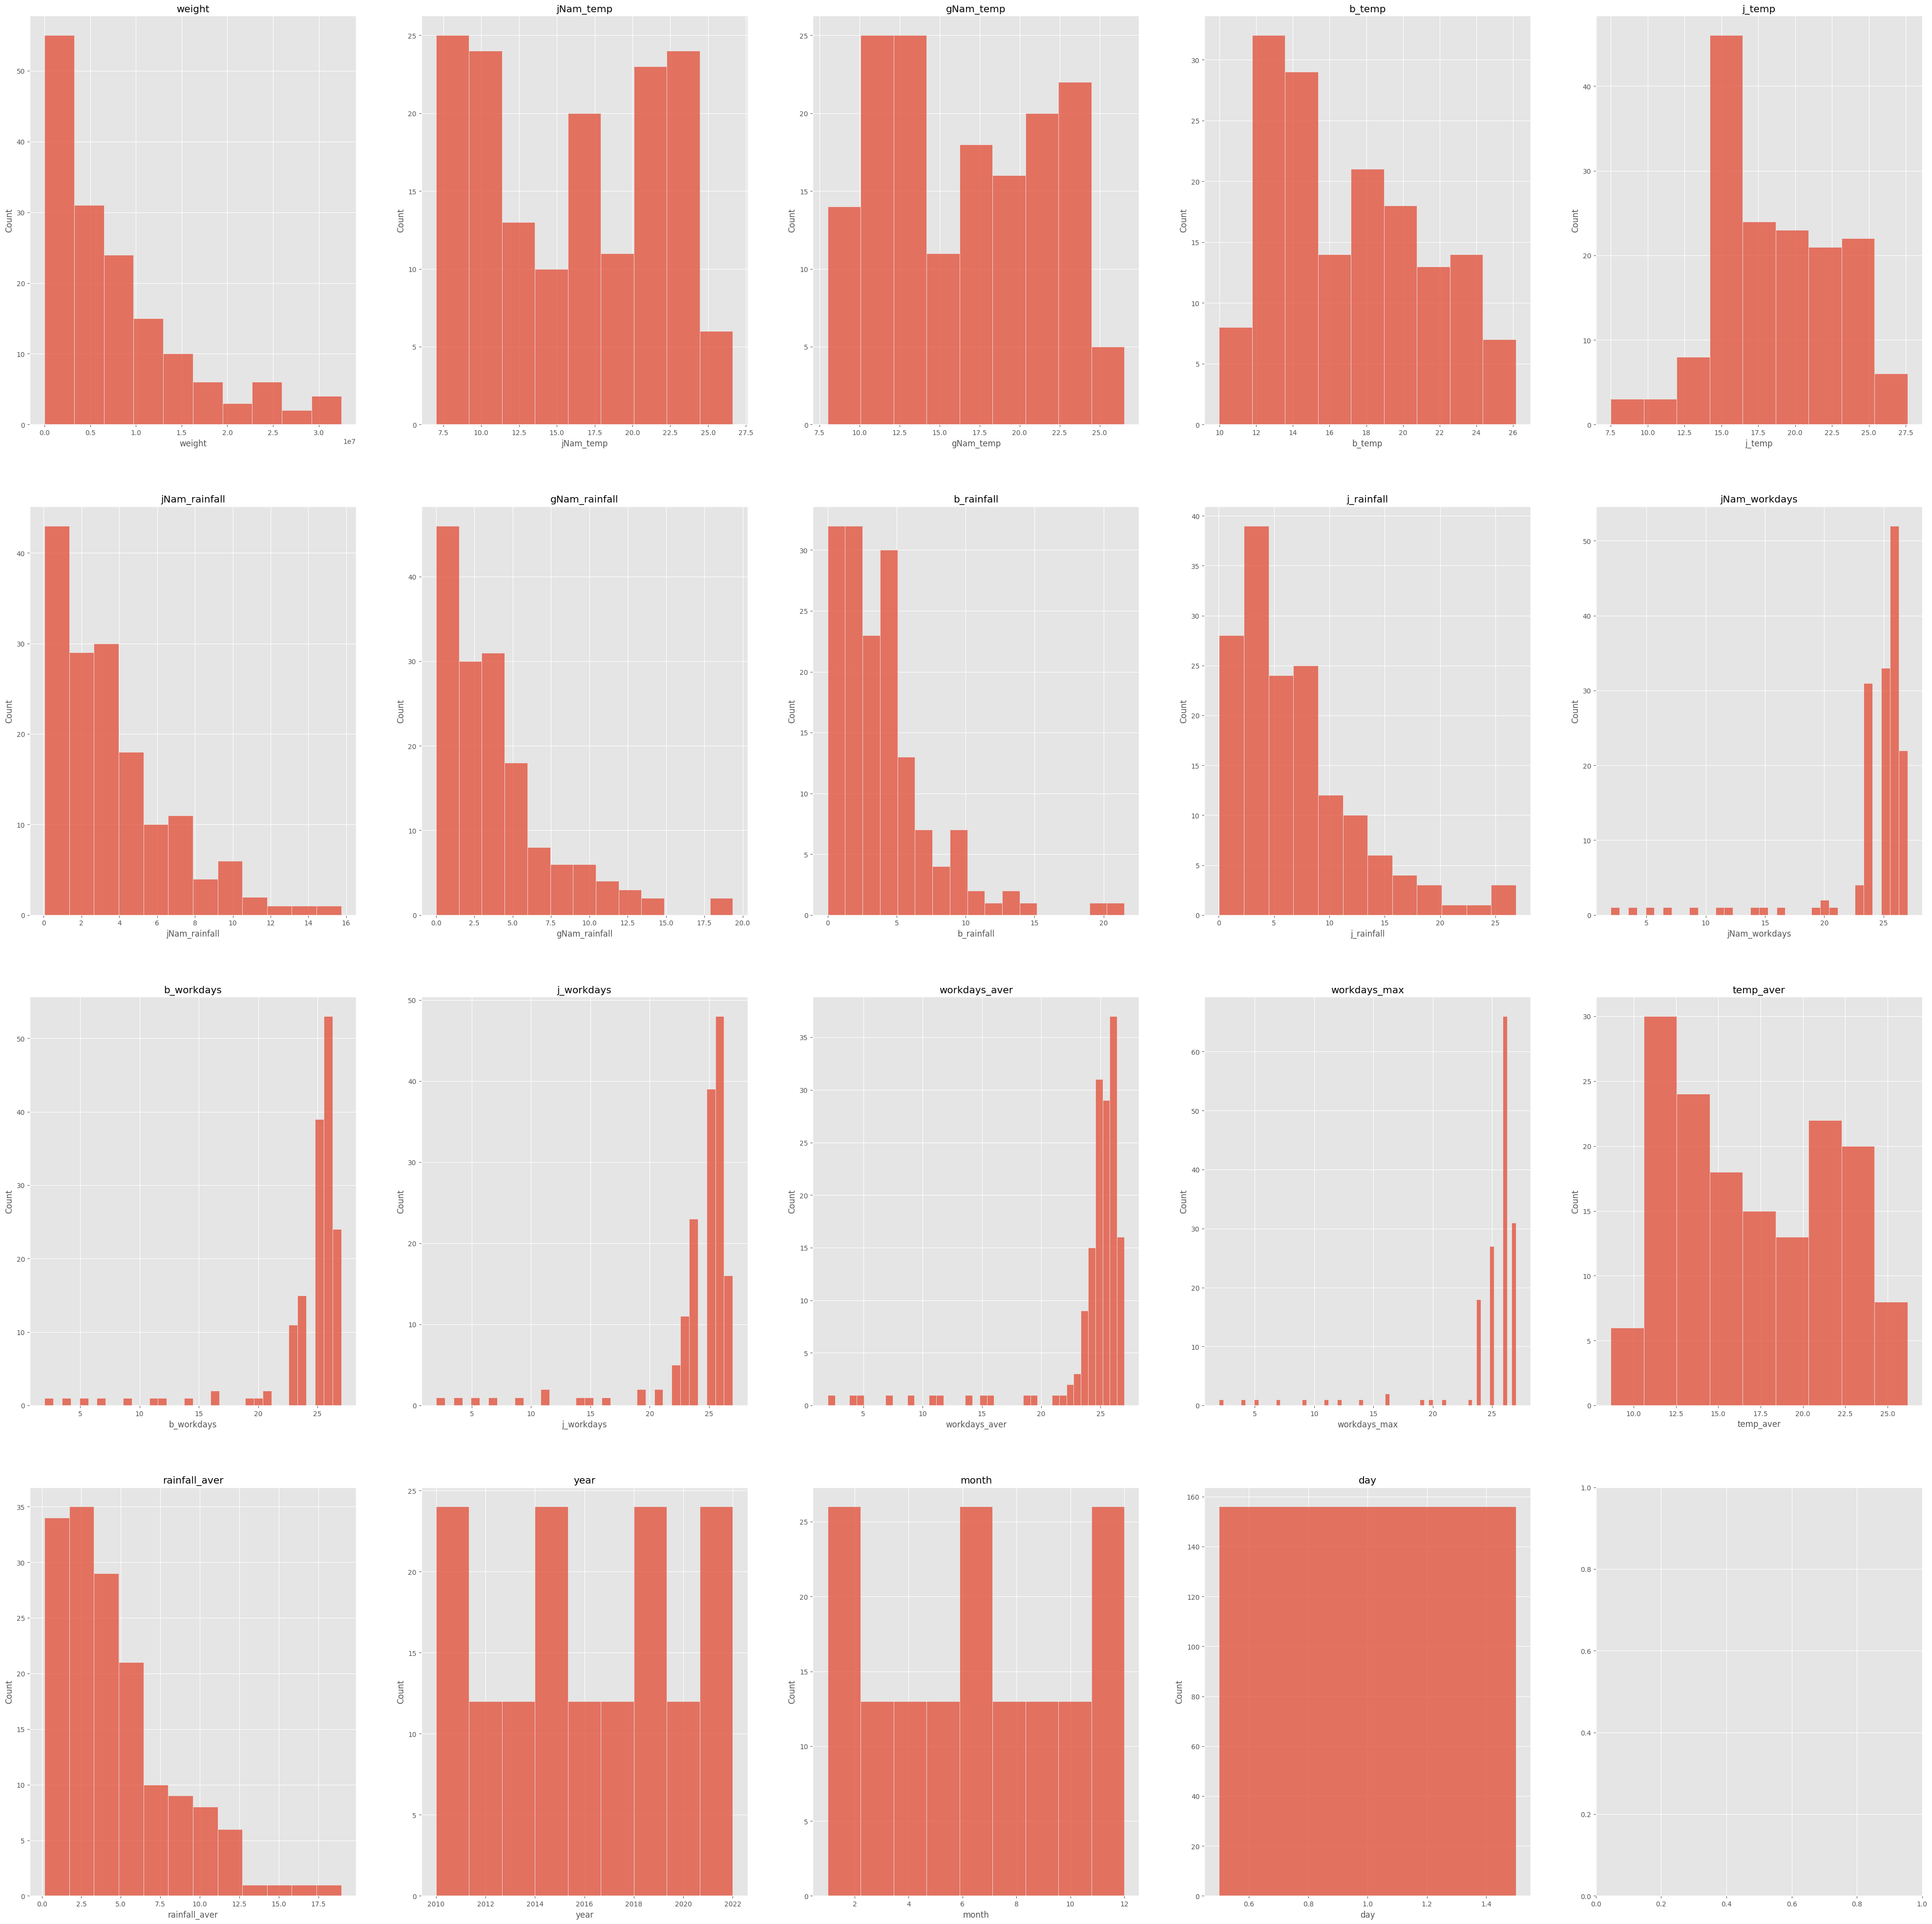

In [ ]:
# ヒストグラムの表示
# 数値型の特徴量のみを取得
num_cols = df.select_dtypes(include=['float', 'int']).columns

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(50, 50))
axes = axes.ravel()

for ax, col in zip(axes, num_cols):
    # sns.distplot(df[col], ax=ax)
    sns.histplot(df[col], ax=ax)
    ax.set(title=col)
    
plt.show()

In [ ]:
# 相関係数の算出
df.corr()

,weight,jNam_temp,gNam_temp,b_temp,j_temp,jNam_rainfall,gNam_rainfall,b_rainfall,j_rainfall,jNam_workdays,b_workdays,j_workdays,workdays_aver,workdays_max,temp_aver,rainfall_aver,year,month,day
weight,1.000000,-0.009462,0.051426,0.188305,0.205970,-0.236246,-0.206237,-0.210961,-0.231793,0.262500,0.255572,0.235704,0.253439,0.277530,0.098278,-0.239673,-9.375184e-02,5.559240e-01,NaN
jNam_temp,-0.009462,1.000000,0.989782,0.935485,0.898846,0.623459,0.610280,0.544738,0.548591,0.069331,0.041092,0.079794,0.063946,0.052260,0.983678,0.622532,5.157143e-02,5.261240e-01,NaN
gNam_temp,0.051426,0.989782,1.000000,0.962880,0.917176,0.594521,0.589816,0.520629,0.524406,0.103277,0.076806,0.112779,0.098459,0.091436,0.993358,0.596384,7.876588e-02,5.619539e-01,NaN
b_temp,0.188305,0.935485,0.962880,1.000000,0.918463,0.526840,0.534706,0.462477,0.482014,0.158891,0.129527,0.163195,0.151834,0.153551,0.974927,0.538291,6.764664e-02,5.862971e-01,NaN
j_temp,0.205970,0.898846,0.917176,0.918463,1.000000,0.503749,0.494449,0.422731,0.440234,0.169128,0.148389,0.166234,0.162643,0.165919,0.951543,0.497966,1.551093e-01,5.893929e-01,NaN
jNam_rainfall,-0.236246,0.623459,0.594521,0.526840,0.503749,1.000000,0.948642,0.828711,0.807754,0.035668,0.033533,0.051508,0.040582,0.028979,0.582168,0.952853,-7.297644e-02,1.258494e-01,NaN
gNam_rainfall,-0.206237,0.610280,0.589816,0.534706,0.494449,0.948642,1.000000,0.916255,0.754591,0.043456,0.035583,0.060840,0.047026,0.035540,0.576451,0.956436,-5.843319e-02,1.267979e-01,NaN
b_rainfall,-0.210961,0.544738,0.520629,0.462477,0.422731,0.828711,0.916255,1.000000,0.693661,0.038590,0.019760,0.043252,0.034155,0.023297,0.505560,0.907810,3.328361e-02,9.161938e-02,NaN
j_rainfall,-0.231793,0.548591,0.524406,0.482014,0.440234,0.807754,0.754591,0.693661,1.000000,-0.021206,-0.033380,-0.013243,-0.022810,-0.024847,0.515979,0.903062,1.613264e-02,1.103026e-01,NaN
jNam_workdays,0.262500,0.069331,0.103277,0.158891,0.169128,0.035668,0.043456,0.038590,-0.021206,1.000000,0.972963,0.978564,0.992366,0.987678,0.122042,0.019839,-2.677122e-01,1.730541e-01,NaN


In [ ]:
# 相関関係
# sns.pairplot(df)

In [ ]:
df

,date,weight,jNam_temp,gNam_temp,b_temp,j_temp,jNam_rainfall,gNam_rainfall,b_rainfall,j_rainfall,jNam_workdays,b_workdays,j_workdays,workdays_aver,workdays_max,temp_aver,rainfall_aver,year,month,day
0,2010-01-01,3616317,7.710968,11.241298,12.222849,15.409677,0.992608,0.925323,1.162757,2.068100,25,25,24,24.666667,25,11.646198,1.287197,2010,1,1
1,2010-02-01,2596299,7.639643,9.978463,9.978463,8.632500,3.912946,3.928431,3.756494,4.419643,24,23,24,23.666667,24,9.057267,4.004379,2010,2,1
2,2010-03-01,682405,9.784982,10.595047,10.787879,10.448423,3.404346,3.447630,3.956012,8.198029,26,26,26,26.000000,26,10.404083,4.751504,2010,3,1
3,2010-04-01,450360,11.906667,12.205892,12.535152,14.910000,5.040972,4.747417,4.527273,8.807571,26,26,26,26.000000,26,12.889428,5.780808,2010,4,1
4,2010-05-01,427518,15.523369,15.028201,15.028201,15.886810,4.160524,5.082742,6.077713,4.500896,26,26,26,26.000000,26,15.366645,4.955469,2010,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2022-08-01,4839430,24.080136,23.170827,20.480000,27.614606,3.640988,5.684077,5.275434,7.008332,26,26,26,26.000000,26,23.836392,5.402208,2022,8,1
152,2022-09-01,8196152,23.437956,23.745175,23.834000,24.611640,4.883904,5.854705,6.429380,15.837037,24,24,23,23.666667,24,23.907193,8.251257,2022,9,1
153,2022-10-01,9738174,19.926318,20.539405,20.770968,21.593091,0.965883,0.696302,0.351117,1.233858,24,24,25,24.333333,25,20.707445,0.811790,2022,10,1
154,2022-11-01,23263122,15.859551,17.470138,17.981667,19.954472,1.744693,1.864783,1.787179,4.637479,25,26,24,25.000000,26,17.816457,2.508534,2022,11,1


In [ ]:
# 日付をインデックスに変える
df.set_index('date', inplace=True)
df

,weight,jNam_temp,gNam_temp,b_temp,j_temp,jNam_rainfall,gNam_rainfall,b_rainfall,j_rainfall,jNam_workdays,b_workdays,j_workdays,workdays_aver,workdays_max,temp_aver,rainfall_aver,year,month,day
date,,,,,,,,,,,,,,,,,,,
2010-01-01,3616317,7.710968,11.241298,12.222849,15.409677,0.992608,0.925323,1.162757,2.068100,25,25,24,24.666667,25,11.646198,1.287197,2010,1,1
2010-02-01,2596299,7.639643,9.978463,9.978463,8.632500,3.912946,3.928431,3.756494,4.419643,24,23,24,23.666667,24,9.057267,4.004379,2010,2,1
2010-03-01,682405,9.784982,10.595047,10.787879,10.448423,3.404346,3.447630,3.956012,8.198029,26,26,26,26.000000,26,10.404083,4.751504,2010,3,1
2010-04-01,450360,11.906667,12.205892,12.535152,14.910000,5.040972,4.747417,4.527273,8.807571,26,26,26,26.000000,26,12.889428,5.780808,2010,4,1
2010-05-01,427518,15.523369,15.028201,15.028201,15.886810,4.160524,5.082742,6.077713,4.500896,26,26,26,26.000000,26,15.366645,4.955469,2010,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,4839430,24.080136,23.170827,20.480000,27.614606,3.640988,5.684077,5.275434,7.008332,26,26,26,26.000000,26,23.836392,5.402208,2022,8,1
2022-09-01,8196152,23.437956,23.745175,23.834000,24.611640,4.883904,5.854705,6.429380,15.837037,24,24,23,23.666667,24,23.907193,8.251257,2022,9,1
2022-10-01,9738174,19.926318,20.539405,20.770968,21.593091,0.965883,0.696302,0.351117,1.233858,24,24,25,24.333333,25,20.707445,0.811790,2022,10,1


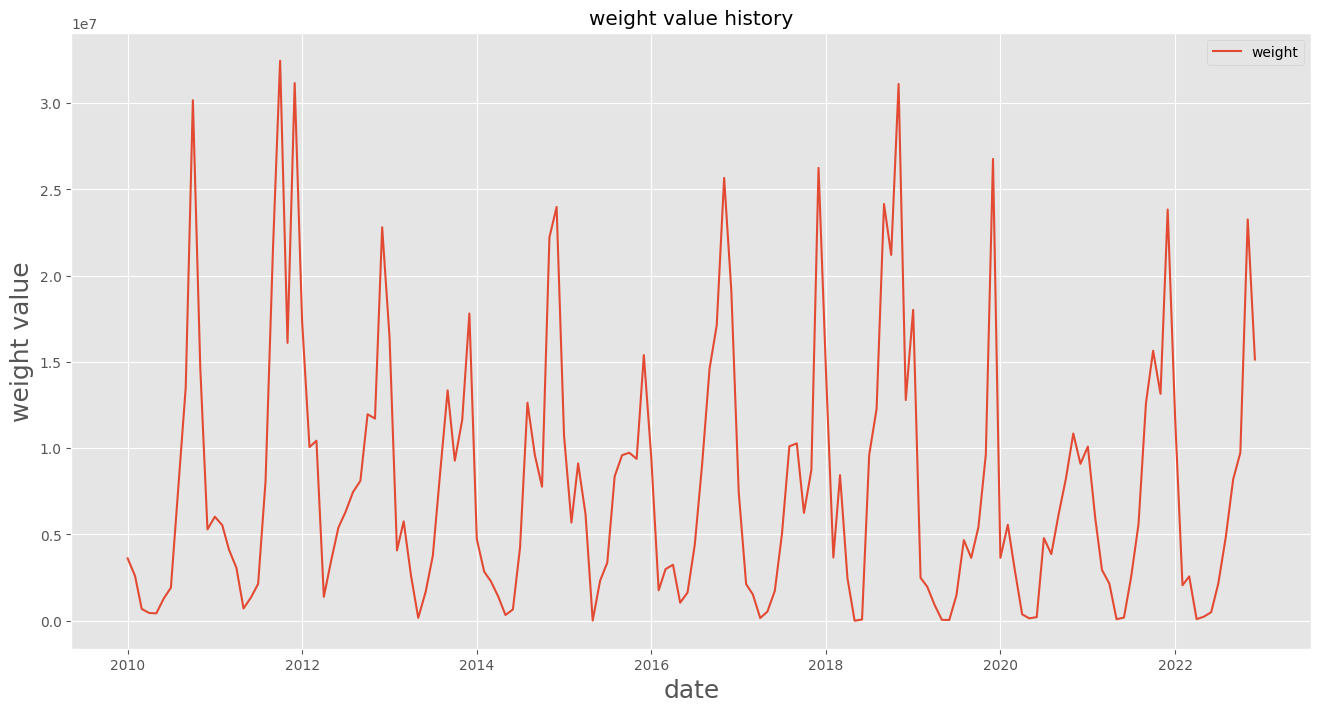

In [ ]:
plt.figure(figsize=(16, 8))
plt.title("weight value history")
plt.plot(df["weight"])
plt.xlabel("date", fontsize=18)
plt.ylabel("weight value", fontsize=18)
plt.legend(["weight"])
plt.show()

In [ ]:
train = df.loc[:"2020-12-01"].values
len(train)

132

In [ ]:
val = df.loc["2021-01-01":"2021-12-01"].values
len(val)

12

In [ ]:
test = df.loc["2022-01-01"::].values
len(test)

12

In [ ]:
# スケーリング
weight_scaler = StandardScaler()
feature_scaler = StandardScaler()

weight_train = train[:, 0].reshape(-1, 1)
weight_val = val[:, 0].reshape(-1, 1)
weight_test = test[:, 0].reshape(-1, 1)

weight_scaler.fit(weight_train)
scaled_weight_train = weight_scaler.transform(weight_train)
scaled_weight_val = weight_scaler.transform(weight_val)
scaled_weight_test = weight_scaler.transform(weight_test)

feature_scaler.fit(train[:, 1:])
scaled_train = feature_scaler.transform(train[:, 1:])
scaled_val = feature_scaler.transform(val[:, 1:])
scaled_test = feature_scaler.transform(test[:, 1:])

scaled_train = np.concatenate([scaled_weight_train, scaled_train], axis=1)
scaled_val = np.concatenate([scaled_weight_val, scaled_val], axis=1)
scaled_test = np.concatenate([scaled_weight_test, scaled_test], axis=1)

In [ ]:
scaled_train.shape

(132, 19)

In [ ]:
scaled_val.shape

(12, 19)

In [ ]:
scaled_test.shape

(12, 19)

In [ ]:
from typing import Tuple

# シーケンスサイズが30の場合 -> (0, 30) -> (1, 31) -> ...
def make_sequence_data(data: np.ndarray, sequence_size: int, target_feature_index: int) -> Tuple[np.ndarray, np.ndarray]:
    """データをsequence_sizeに指定したサイズのシーケンスに分けてシーケンスとその答えをarrayで返す
    Args:
        data (np.ndarray): 入力データ
        sequence_size (int): シーケンスサイズ
        target_feature_index (int): シーケンスに含める特徴量のインデックス
    Returns:
        seq_arr: sequence_sizeに指定した数のシーケンスを格納するarray
        target_arr: シーケンスに対応する答えを格納するarray
    """
    
    num_data = len(data)
    seq_data = []
    target_data = []
    for i in range(num_data - sequence_size):
        seq_data.append(data[i:i+sequence_size])
        target_data.append(data[i+sequence_size:i+sequence_size+1, target_feature_index])
    seq_arr = np.array(seq_data)
    target_arr = np.array(target_data)

    return seq_arr, target_arr

In [ ]:
# seq_length = 3
target_index = 0

train_X, train_Y = make_sequence_data(scaled_train, seq_length, target_index)
val_X, val_Y = make_sequence_data(scaled_val, seq_length, target_index)
test_X, test_Y = make_sequence_data(scaled_test, seq_length, target_index)

In [ ]:
train_X.shape

(126, 6, 19)

In [ ]:
val_X.shape

(6, 6, 19)

In [ ]:
test_X.shape

(6, 6, 19)

In [ ]:
# テンソル変換してLSTMに入力するために軸を変更(シーケンス、バッチサイズ、入力次元)
tensor_train_X = torch.FloatTensor(train_X).permute(1, 0, 2)
tensor_train_Y = torch.FloatTensor(train_Y.reshape(len(train_Y), 1, -1)).permute(1, 0, 2)

tensor_val_X = torch.FloatTensor(val_X).permute(1, 0, 2)
tensor_val_Y = torch.FloatTensor(val_Y.reshape(len(val_X), 1, -1)).permute(1, 0, 2)

tensor_test_X = torch.FloatTensor(test_X).permute(1, 0, 2)
tensor_test_Y = torch.FloatTensor(test_Y.reshape(len(test_Y), 1, -1)).permute(1, 0, 2)

In [ ]:
tensor_train_X = tensor_train_X.to(device)
tensor_train_Y = tensor_train_Y.to(device)
tensor_val_X = tensor_val_X.to(device)
tensor_val_Y = tensor_val_Y.to(device)
tensor_test_X = tensor_test_X.to(device)
tensor_test_Y = tensor_test_Y.to(device)

In [ ]:
tensor_train_X.shape

torch.Size([6, 126, 19])

In [ ]:
tensor_train_Y.shape

torch.Size([1, 126, 1])

### モデルの構築

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.lstm = nn.LSTM(input_size=self.input_size, hidden_size=self.hidden_size) # batch_first=True
        self.linear = nn.Linear(self.hidden_size, self.output_size)

    def forward(self, x):
        x, _ = self.lstm(x)
        x_last = x[-1]
        x = self.linear(x_last)

        return x

In [ ]:
model = LSTM(train_X.shape[2], 100, 1)
criterion = nn.MSELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
# GPUに送る
model.to(device)

LSTM(
  (lstm): LSTM(19, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

In [ ]:
class EarlyStopping:
    def __init__(self, patience=7, verbose=False):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.force_cancel = False

    def __call__(self, val_loss, model):
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score:
            self.counter += 1
            print(
                f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        if self.verbose:
            print(
                f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), 'model.pth')
        self.val_loss_min = val_loss

### 学習

In [ ]:
# バッチ学習
num_epochs = 4000
losses = []

# EarlyStoppingの設定
early_stopping = EarlyStopping(patience=10, verbose=True)

for epoch in range(num_epochs):
    optimizer.zero_grad()
    output = model(tensor_train_X)
    loss = criterion(output, tensor_train_Y)
    loss.backward()
    losses.append(loss.item())
    optimizer.step()

    if epoch % 10 == 0:
        print(f"epoch: {epoch}, loss: {loss.item()}")

    # 検証データで性能評価
    with torch.no_grad():
        val_output = model(tensor_val_X)
        val_loss = criterion(val_output, tensor_val_Y)

    # アーリーストッピングの判定
    early_stopping(val_loss, model)
    
    if early_stopping.early_stop:
        print("Early stopping")
        break

epoch: 0, loss: 0.9778605699539185
Validation loss decreased (inf --> 0.547731).  Saving model ...
Validation loss decreased (0.547731 --> 0.277845).  Saving model ...
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
EarlyStopping counter: 3 out of 10
EarlyStopping counter: 4 out of 10
EarlyStopping counter: 5 out of 10
EarlyStopping counter: 6 out of 10
EarlyStopping counter: 7 out of 10
EarlyStopping counter: 8 out of 10
epoch: 10, loss: 0.33755961060523987
EarlyStopping counter: 9 out of 10
EarlyStopping counter: 10 out of 10
Early stopping


In [ ]:
# # バッチ学習
# num_epochs = 4000
# losses = []
# for epoch in range(num_epochs):
#     optimizer.zero_grad()
#     output = model(tensor_train_X)
#     loss = criterion(output, tensor_train_Y)
#     loss.backward()
#     losses.append(loss.item())
#     optimizer.step()
#     if epoch % 10 == 0:
#         print(f"epoch: {epoch}, loss: {loss.item()}")

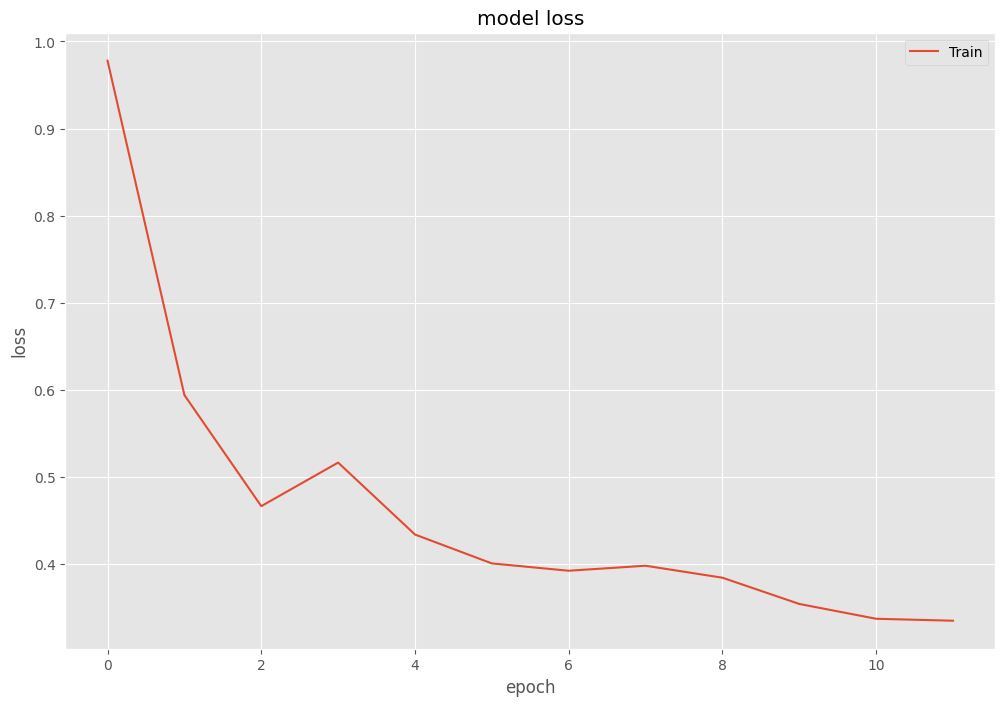

In [ ]:
# バッチ学習
plt.figure(figsize=(12, 8))
plt.title("model loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(losses)
plt.legend(["Train"])
plt.show()

### モデルの保存

In [ ]:
# モデルの保存
torch.save(model.state_dict(), "model_epoch4000_feature19_gpu.pth")
# torch.save(model.to('cpu').state_dict(), "models/model_epoch12000_cpu.pth")

### モデルの読み込み

In [ ]:
# model_path = "model_epoch4000_feature19_gpu.pth"
# device = torch.device('cpu')
# model = LSTM(19, 100, 1)
# model.load_state_dict(torch.load(model_path, map_location=device))

### 推論

In [ ]:
predictions = model(tensor_test_X).detach().cpu().numpy()

In [ ]:
predictions.shape

(6, 1)

In [ ]:
def rmse_loss(predicted, target):
    mse_loss = nn.MSELoss()
    predicted_tensor = torch.from_numpy(predicted)
    target_tensor = torch.from_numpy(target)
    mse_value = mse_loss(predicted_tensor, target_tensor)
    return torch.sqrt(mse_value)

In [ ]:
# rmseの計算
predictions_inv = weight_scaler.inverse_transform(predictions)
test_Y_inv = weight_scaler.inverse_transform(test_Y)
rmse = mean_squared_error(test_Y_inv, predictions_inv, squared=False)
rmse

5061944.4738819925

In [ ]:
rmse = rmse_loss(predictions_inv, test_Y_inv)
rmse

tensor(5061944.4739, dtype=torch.float64)

In [ ]:
# rmseの計算(アーリーストッピング適用)
predictions_inv = weight_scaler.inverse_transform(predictions)
test_Y_inv = weight_scaler.inverse_transform(test_Y)
rmse = mean_squared_error(test_Y_inv, predictions_inv, squared=False)
rmse

5061944.4738819925

In [ ]:
# r2の計算
from sklearn.metrics import r2_score
r2 = r2_score(test_Y_inv, predictions_inv)
r2

0.47306638071976514

In [ ]:
# rmsle 
from sklearn.metrics import mean_squared_log_error
rmsle = np.sqrt(mean_squared_log_error(test_Y_inv, predictions_inv))
rmsle 

0.3554648756778752

In [ ]:
# rmsle = 0

In [ ]:
# mape 
mape = np.mean(np.abs((test_Y_inv - predictions_inv) / test_Y_inv)) * 100
mape

23.653769086067467

### 可視化

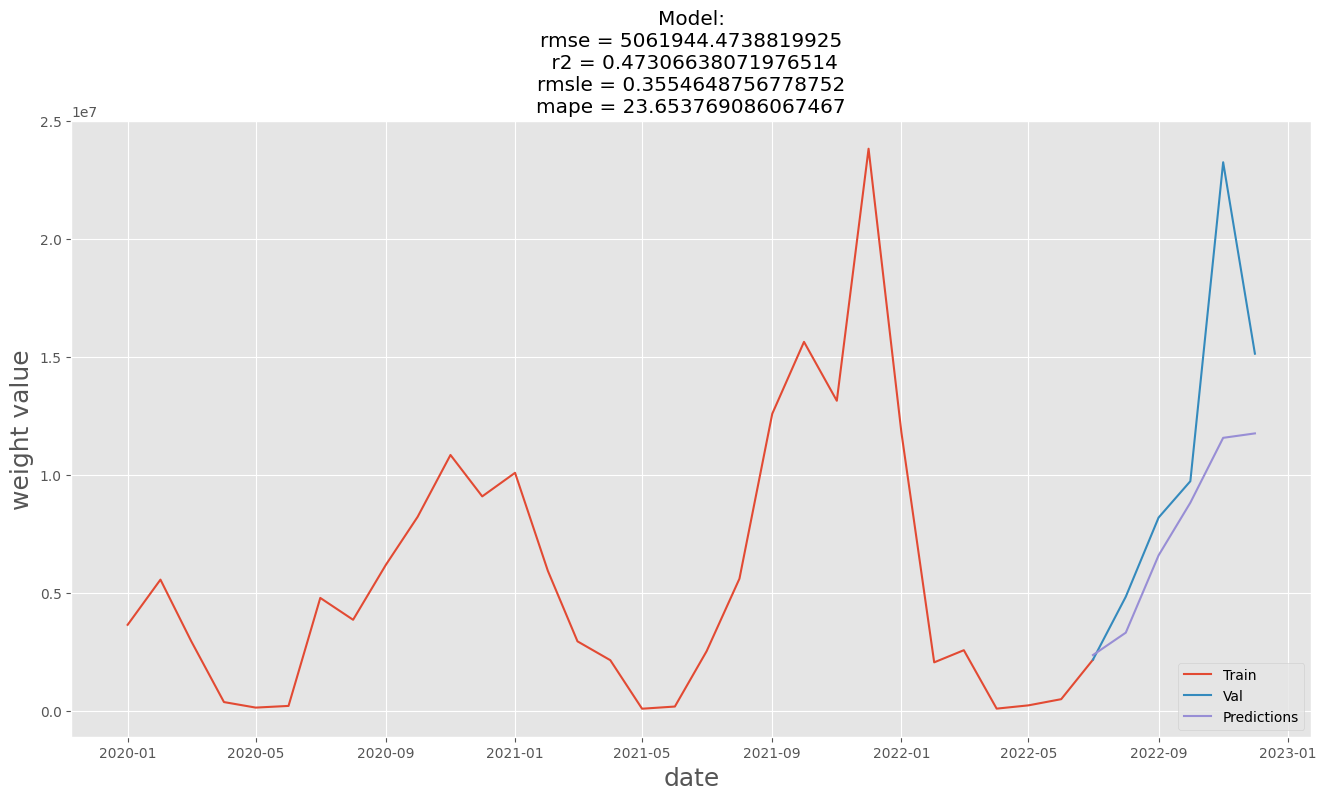

In [ ]:
# プロットデータ
train = df.loc["2020-01-01":f"2022-0{seq_length+1}-01"]
valid = df.loc[f"2022-0{seq_length+1}-01"::] 
valid["Predictions"] = weight_scaler.inverse_transform(predictions)
# valid["Predictions"] = predictions
# 可視化
plt.figure(figsize=(16, 8))
plt.title(f'Model:\nrmse = {rmse}\n r2 = {r2}\nrmsle = {rmsle}\nmape = {mape}')
plt.xlabel('date', fontsize=18)
plt.ylabel('weight value', fontsize=18)
plt.plot(train['weight'])
plt.plot(valid[['weight', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid[["weight", "Predictions"]]

,weight,Predictions
date,,
2022-07-01,2170542,2365421.75
2022-08-01,4839430,3315243.25
2022-09-01,8196152,6594689.00
2022-10-01,9738174,8826577.00
2022-11-01,23263122,11577189.00
2022-12-01,15145032,11765410.00
